# Author:-Harshal Kakade

## Task-1:-Prediction Using Supervised ML

## Problem Statement:-Predict the percentage of an student based on the number of study hours.


# The Spark Foundation
## Graduate Rotational Internship Program(GRIP) July-2021 Batch
### Data Science and Business Analytics 

In [3]:
# importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [4]:
# importing and reading dataset
url='http://bit.ly/w-data'

# reading the dataset
df=pd.read_csv(url)

# head() displays first 5 rows of dataset
df.head()  

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# checking shape of dataset
df.shape

(25, 2)

In [6]:
# checking data types of features
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
# checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# ckecking for missing/null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no missing/null values in dataset

In [9]:
# checking basic Statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


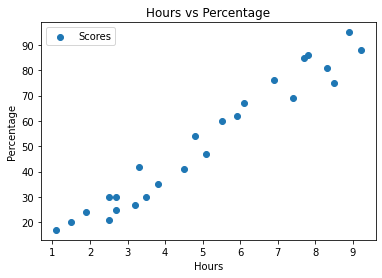

In [10]:
# visualization of data 
x=df['Hours']
y=df['Scores']

plt.scatter(x,y,label='Scores')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.legend()

plt.show()

From the above graph, we can see that there is a positive linear relationship between hours and percentage it means that when the study hours increases percentage will also increases.

### preaparing the data for training and testing

In [11]:
# divide data into dependent and independent features
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [12]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=45)

In [13]:
xtrain.shape

(20, 1)

In [14]:
xtest.shape

(5, 1)

In [15]:
ytrain.shape

(20,)

In [16]:
ytest.shape

(5,)

### model building

In [17]:
# importing linear regression from sklearn library
from sklearn.linear_model import LinearRegression

# creating object of linear regression
lr=LinearRegression()

# train the model 
lr.fit(xtrain,ytrain)

LinearRegression()

In [18]:
# predictions on xtest
ypred=lr.predict(xtest)
ypred

array([25.36183967, 27.35052222, 33.31656984, 77.06758572, 19.39579205])

In [19]:
# comparing the actual and predicted values
df2=pd.DataFrame({'Actual':ytest,'Predicted':ypred})
df2

,Actual,Predicted
0,30,25.361840
1,30,27.350522
2,42,33.316570
3,85,77.067586
4,24,19.395792


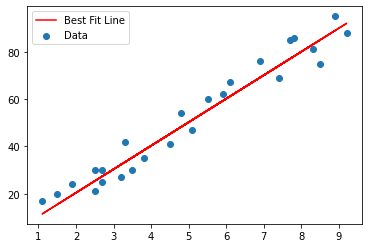

In [20]:
# visualization of model prediction
line=lr.coef_ * x + lr.intercept_

plt.scatter(x,y,label='Data')
plt.plot(x,line,label='Best Fit Line',c='r')
plt.legend()

plt.show()

In [21]:
# ckecking/evaluating performance of model
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print('Mean Absolute Error:',mean_absolute_error(ytest,ypred))
print('R2 score:',r2_score(ytest,ypred))

Mean Absolute Error: 5.701538099875746
R2 score: 0.9235792627359557


In [22]:
# we can also test with our own data
hours = 9.25
prediction=lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction))

No of Hours = 9.25
Predicted Score = [92.47987541]


If the student study 9.25 hours then he will get 92.47 percentage.